In [2]:
from imp import reload
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

from lib import IO
from lib import Loader
from lib import graph
from lib import pt_utils
from lib import utils

plt.rcParams['figure.dpi'] = 200

reload(Loader)
reload(graph)
reload(IO)
la = Loader.LALoader()
bjh = Loader.BJLoader('highway')
bjm = Loader.BJLoader('metro')

LA_MODEL_PATH = 'data/models/LA/GARNNGRUHead4Hid64Lay2NodeTimeDay5min'
LA_FIG_PATH = 'fig/LA/GARNNGRUHead4Hid64Lay2NodeTimeDay5min/'
BJ_MODEL_PATH = 'data/models/BJ_highway/GARNNGRUHead4MaskedHid64Lay2NodeTimeDay15min'


# Los Angeles

### Time Series

(265, 207) (265, 207)


<Figure size 1200x800 with 0 Axes>

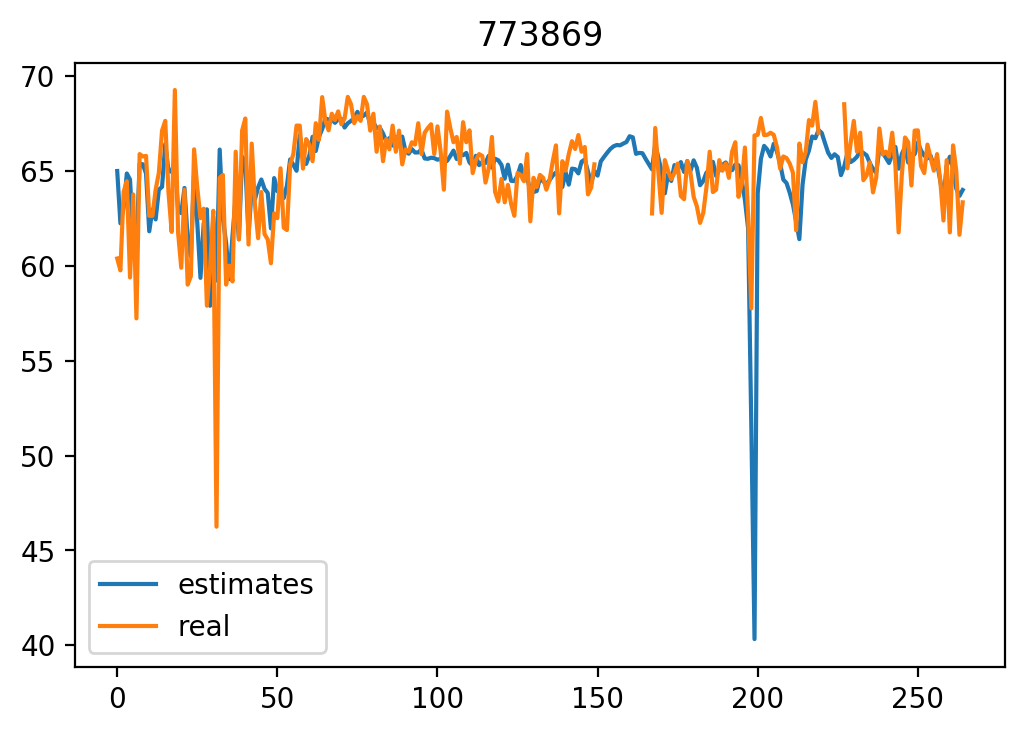

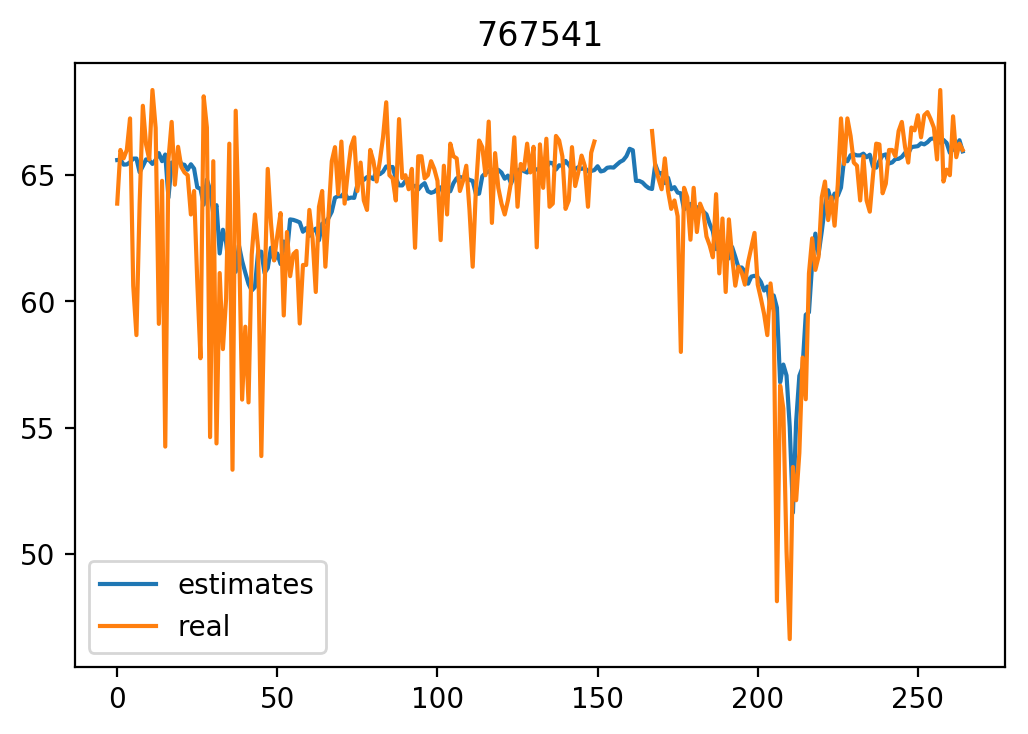

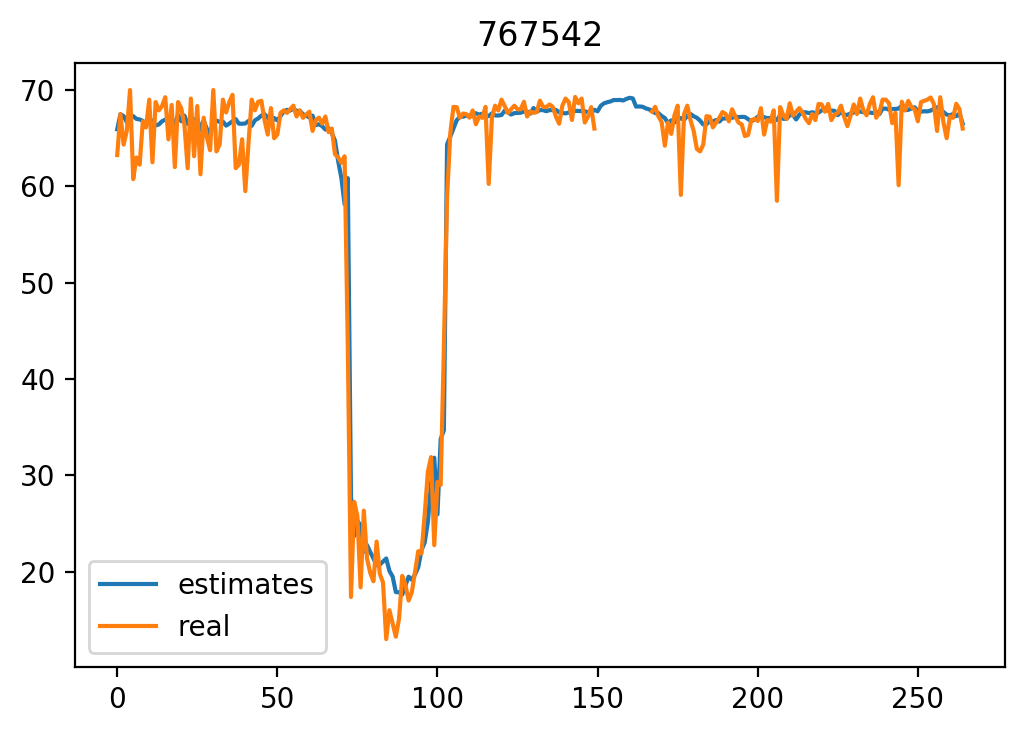

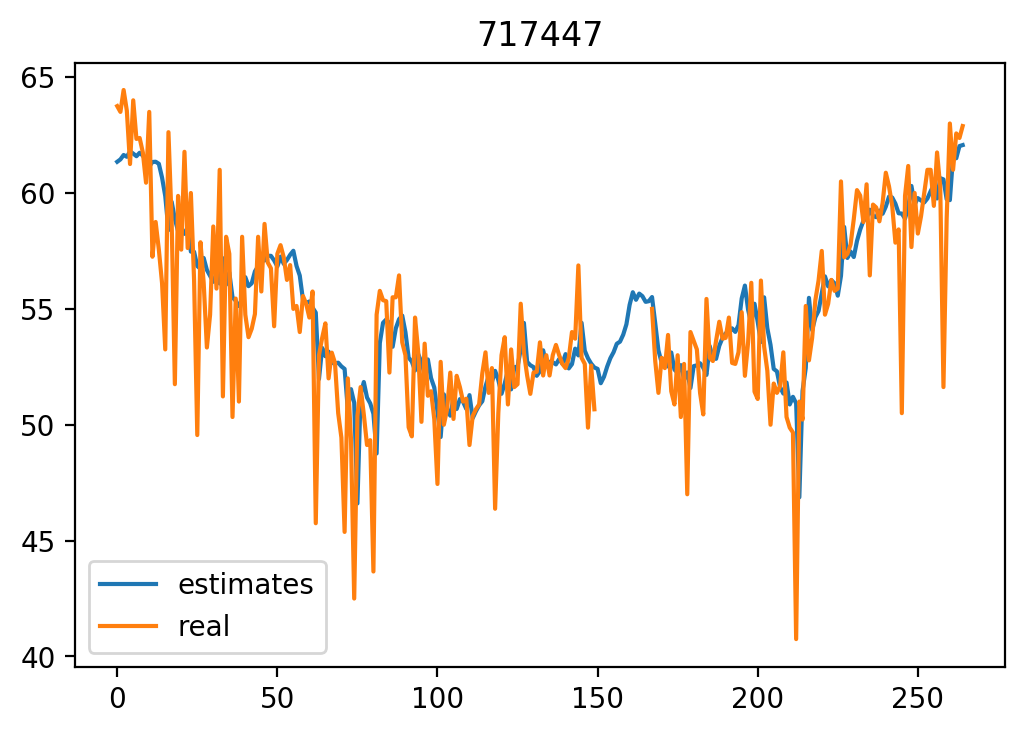

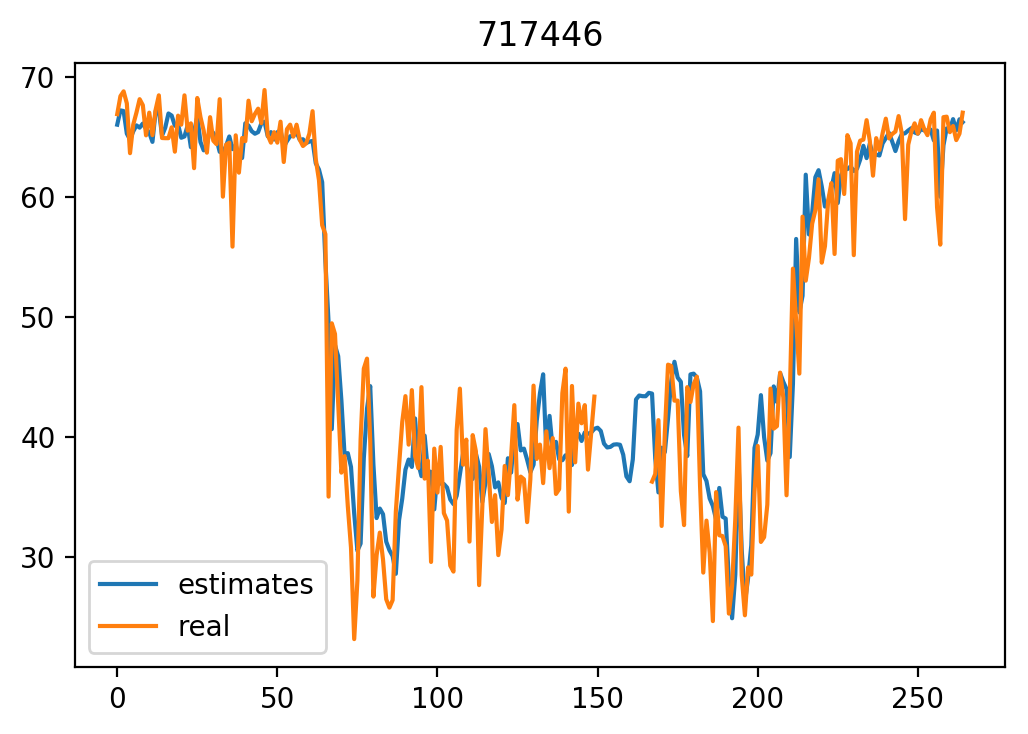

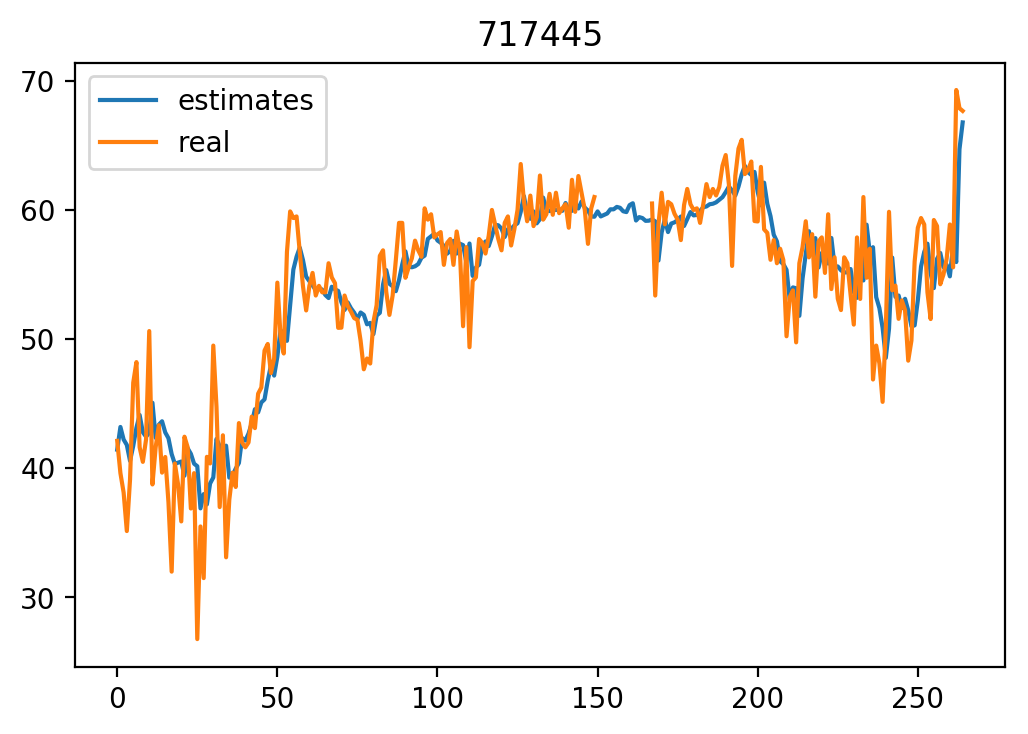

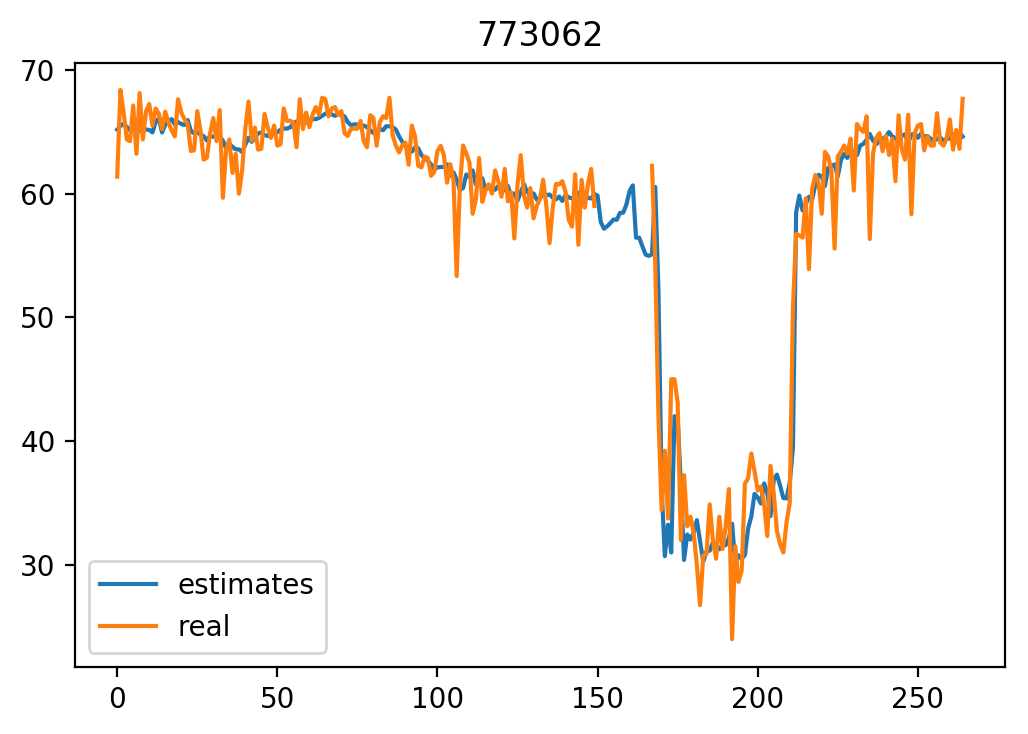

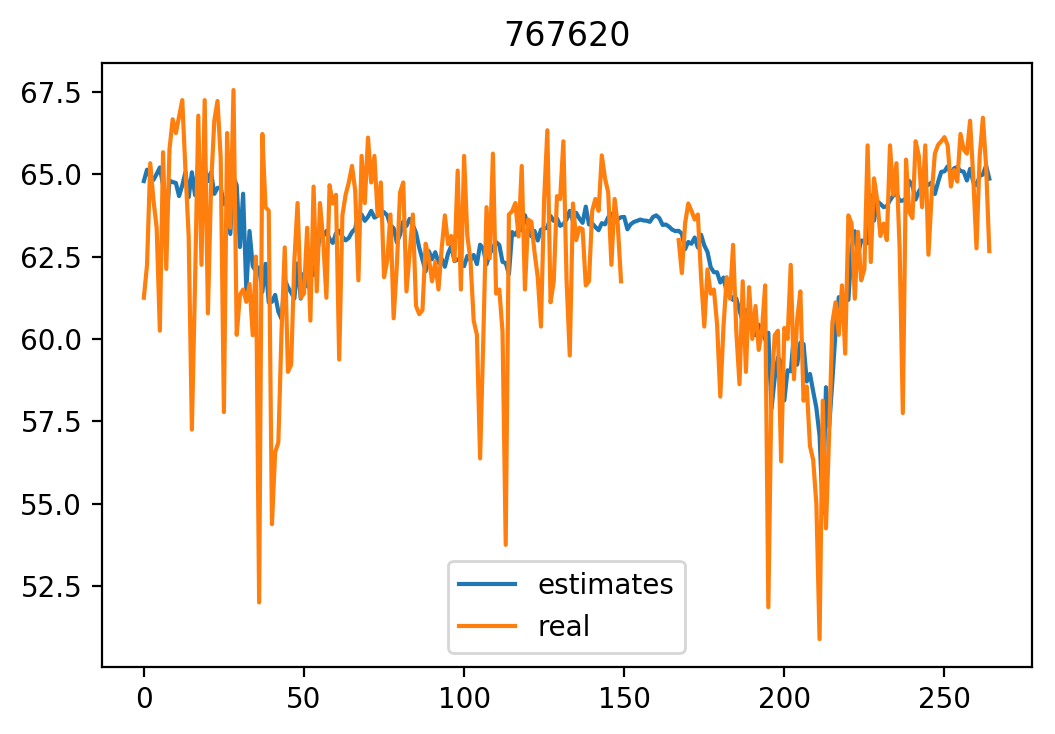

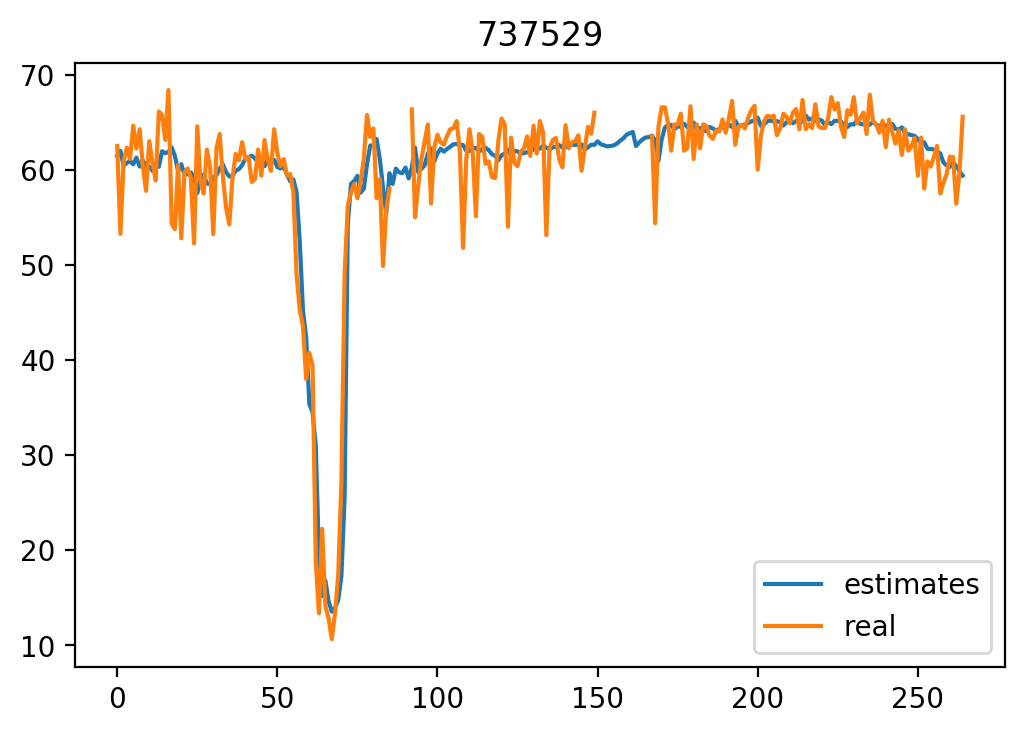

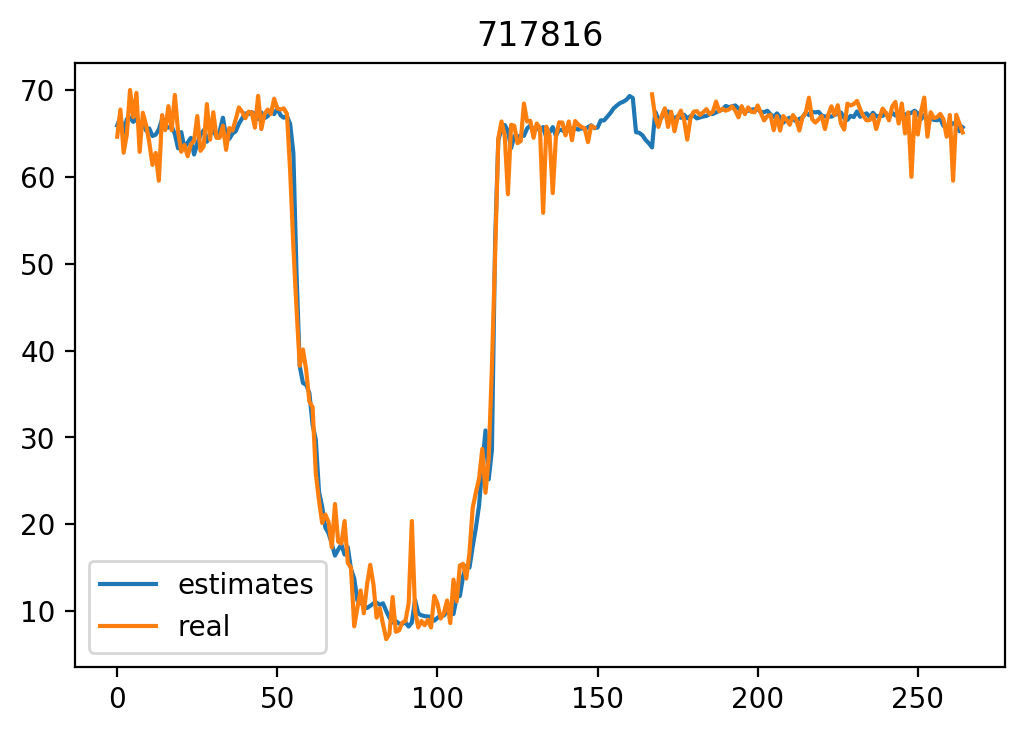

In [10]:
plt.clf()
node = la.load_node()
target = np.load(LA_MODEL_PATH + '_target_0')[:, 0]
output = np.load(LA_MODEL_PATH + '_output_0')[:, 0]
print(target.shape, output.shape)
for i in range(10):
    plt.figure()
    output_i = output[:, i]
    target_i = target[:, i]
    plt.plot(output_i, label='estimates')
    plt.plot(target_i, label='real')
    plt.legend()
    plt.title(node.id[i])
    plt.show()
    

### LA Attention

In [10]:
attn_i = np.load(LA_MODEL_PATH + '_info_01')
attn_h = np.load(LA_MODEL_PATH + '_info_11')
print(attn_i.shape, attn_h.shape)
times, num_layers, head_count, _, _ = attn_i.shape
node = la.load_node()

(265, 2, 4, 207, 207) (265, 2, 4, 207, 207)


In [ ]:
reload(graph)
reload(utils)
node = la.load_node()
for attn_str, attn in zip(['input', 'hidden'], [attn_i, attn_h]):
    for time in range(96, 228):
        time_str = utils.minute_str(time * 5 + 60)
        title = time_str + '  ' + attn_str
        plt.clf()
        fig, axes = plt.subplots(2, 2)
        fig.suptitle(title)
        for head, ax in zip([0, 1, 2, 3], axes.flat):
            g = graph.build_attention_graph(attn[time, 1, head], node)
            graph.draw_network(g, ax=ax)
            ax.set_axis_off()
        plt.show()
#         plt.savefig(LA_FIG_PATH + title + '.png')


# BJ_highway

## load data

In [3]:
attn_i = np.load(BJ_MODEL_PATH + '_info_01')
attn_h = np.load(BJ_MODEL_PATH + '_info_11')
print(attn_i.shape, attn_h.shape)
times, num_layers, head_count, _, _ = attn_i.shape
node = bjh.load_node().loc[bjh.ids]

(89, 2, 4, 264, 264) (89, 2, 4, 264, 264)


### BJ Time Series

(89, 264) (89, 264)


<Figure size 1200x800 with 0 Axes>

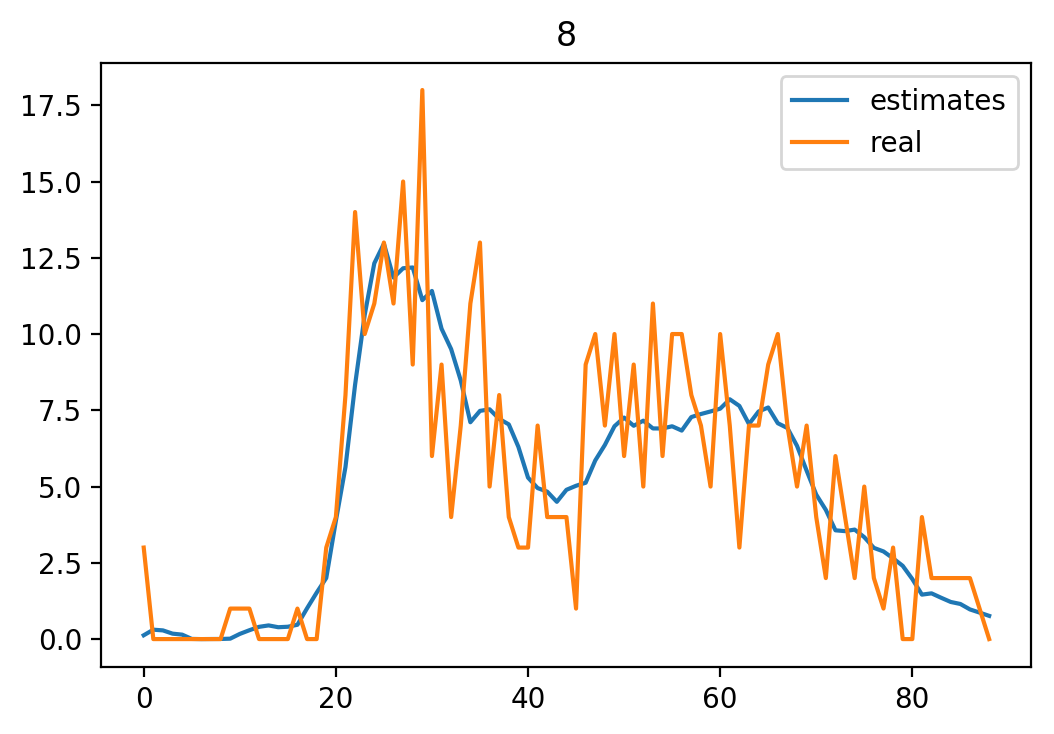

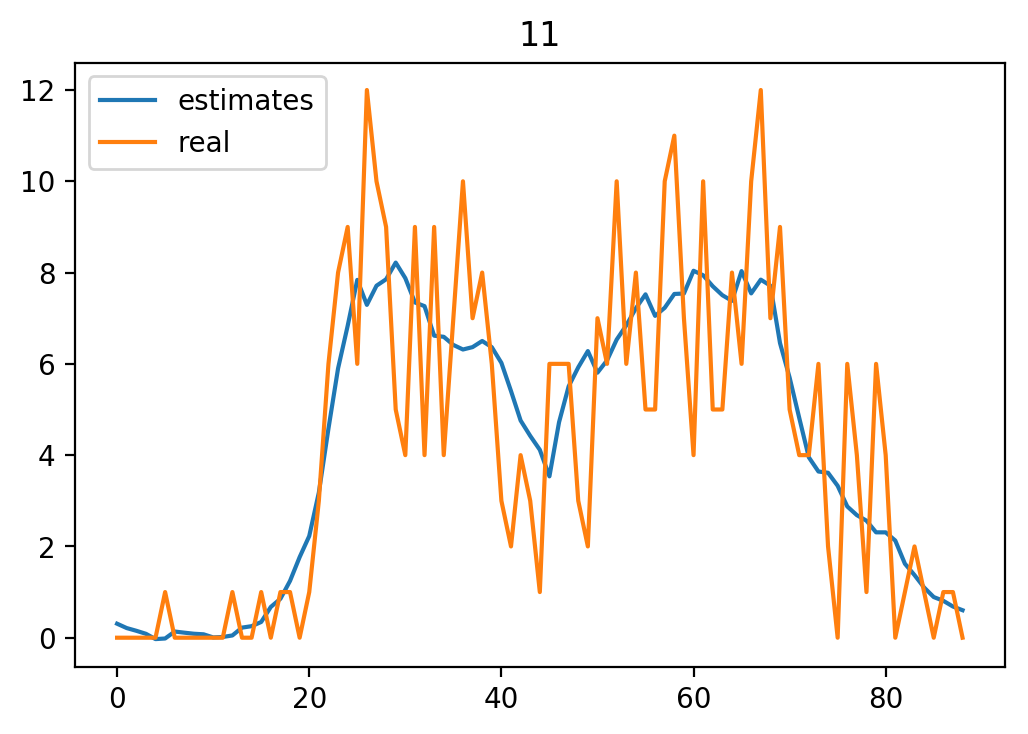

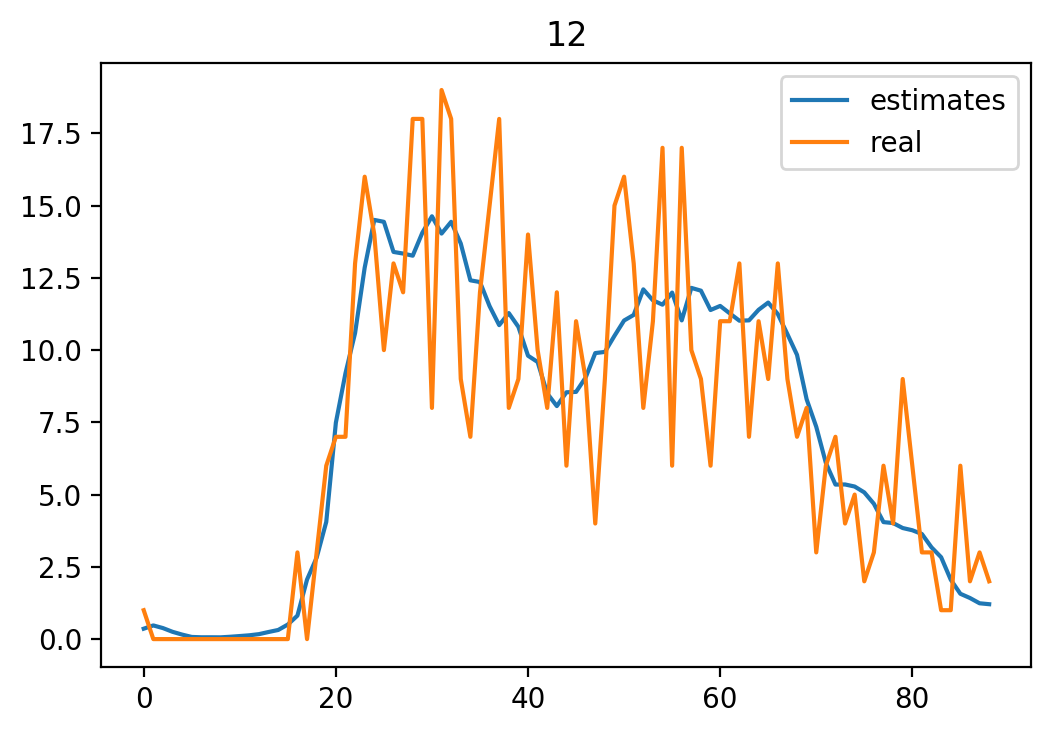

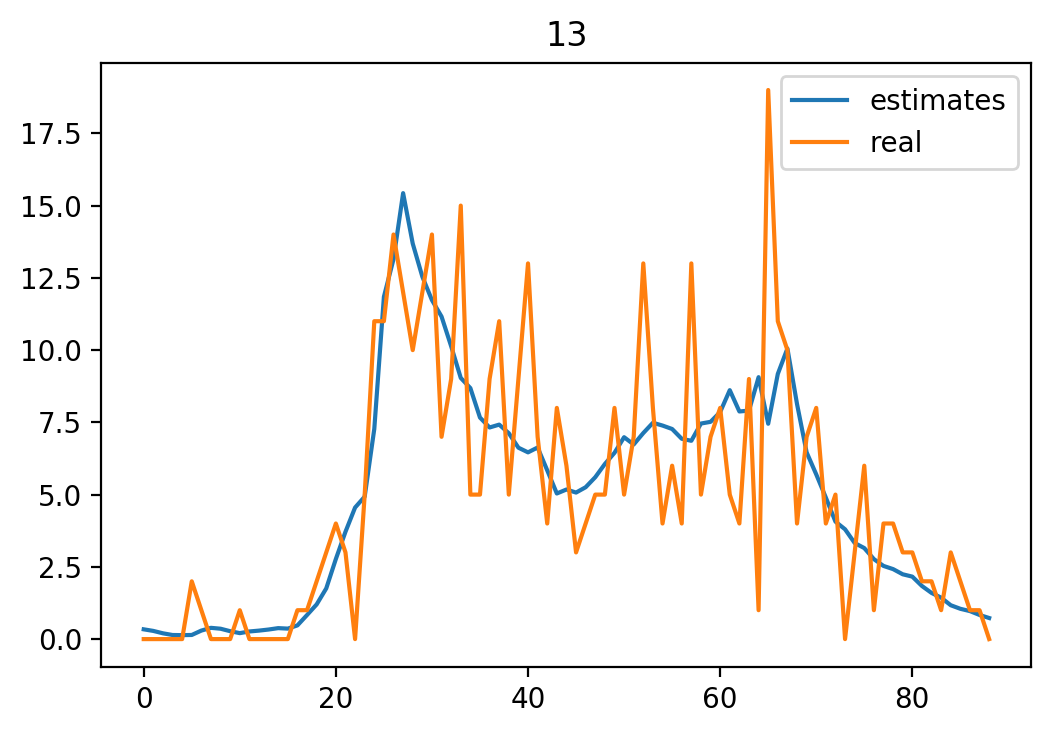

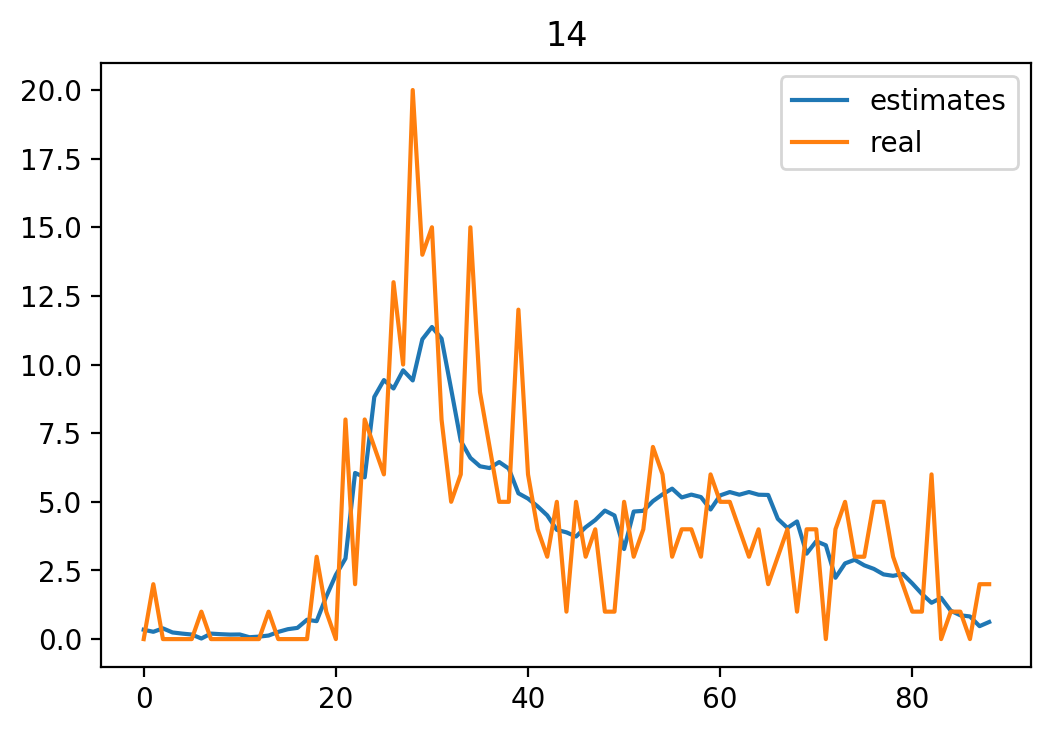

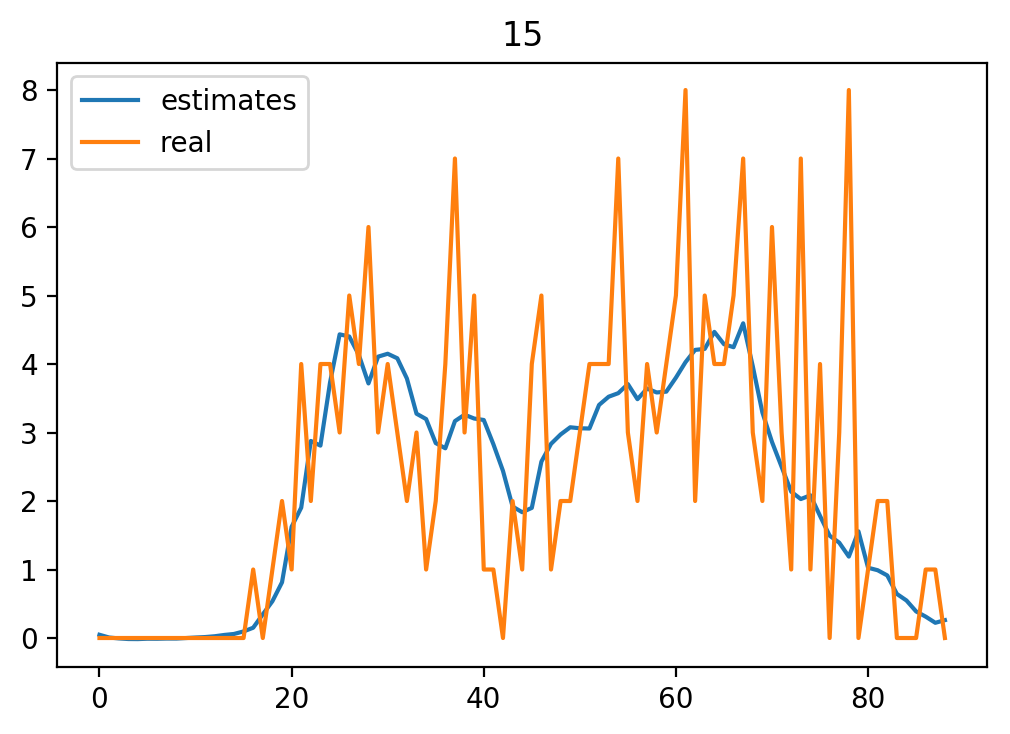

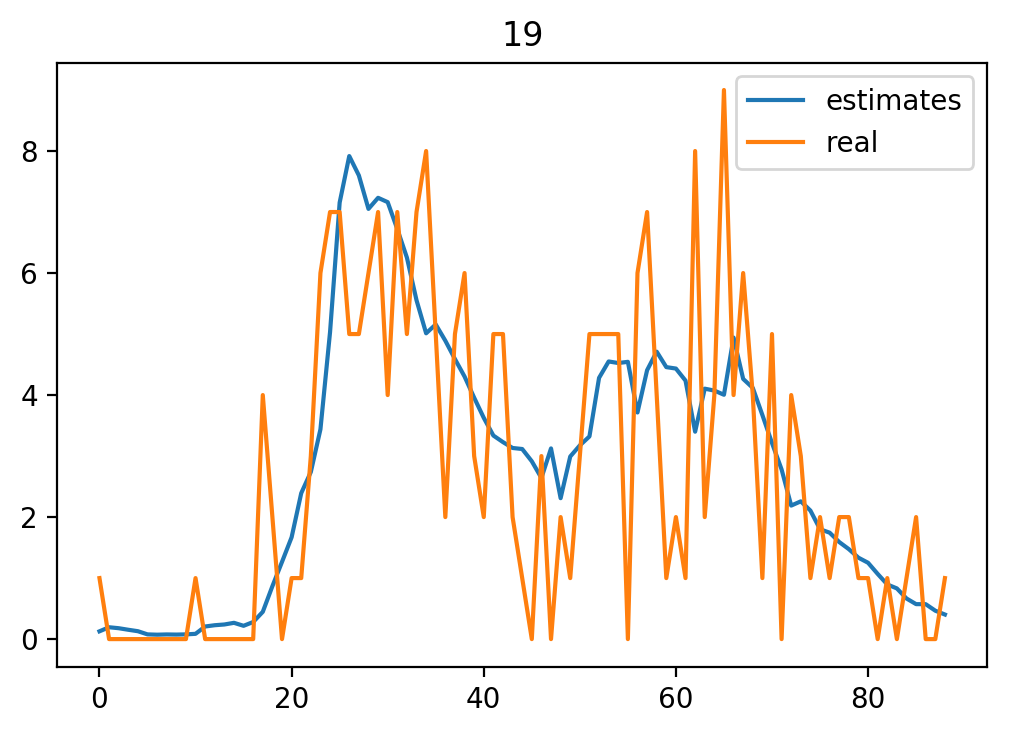

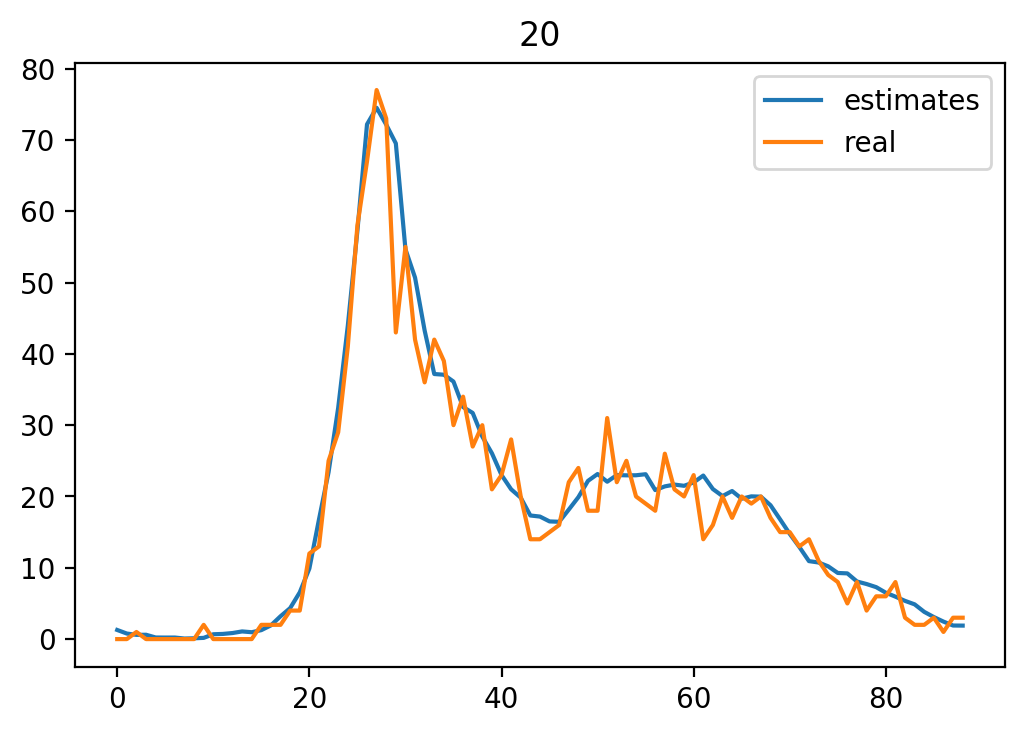

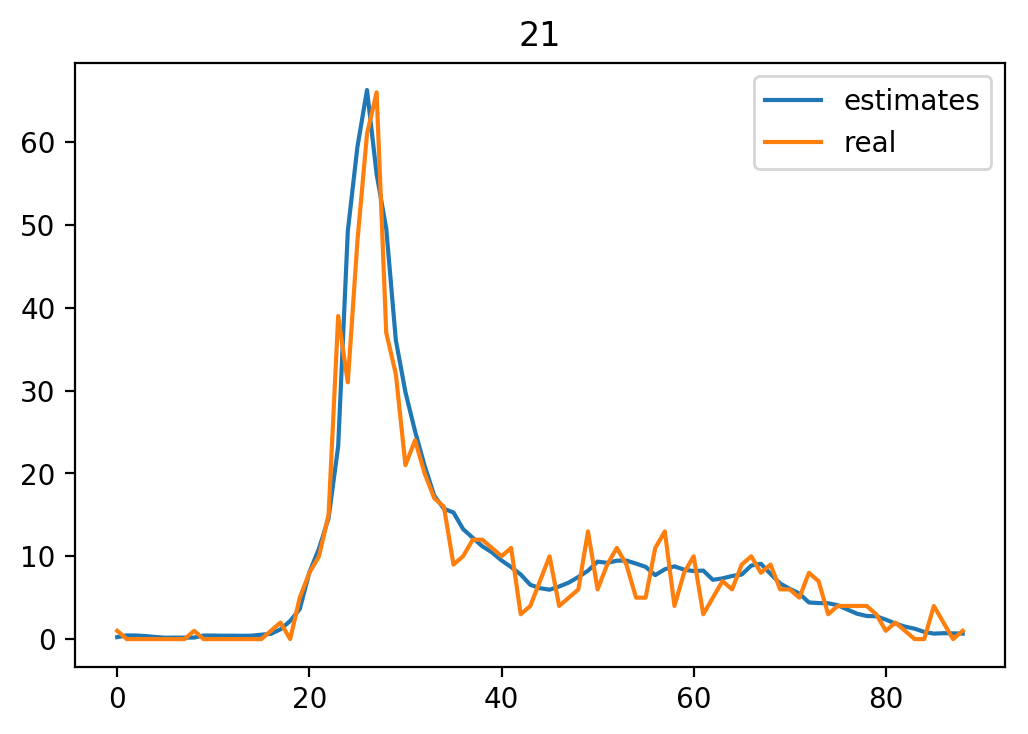

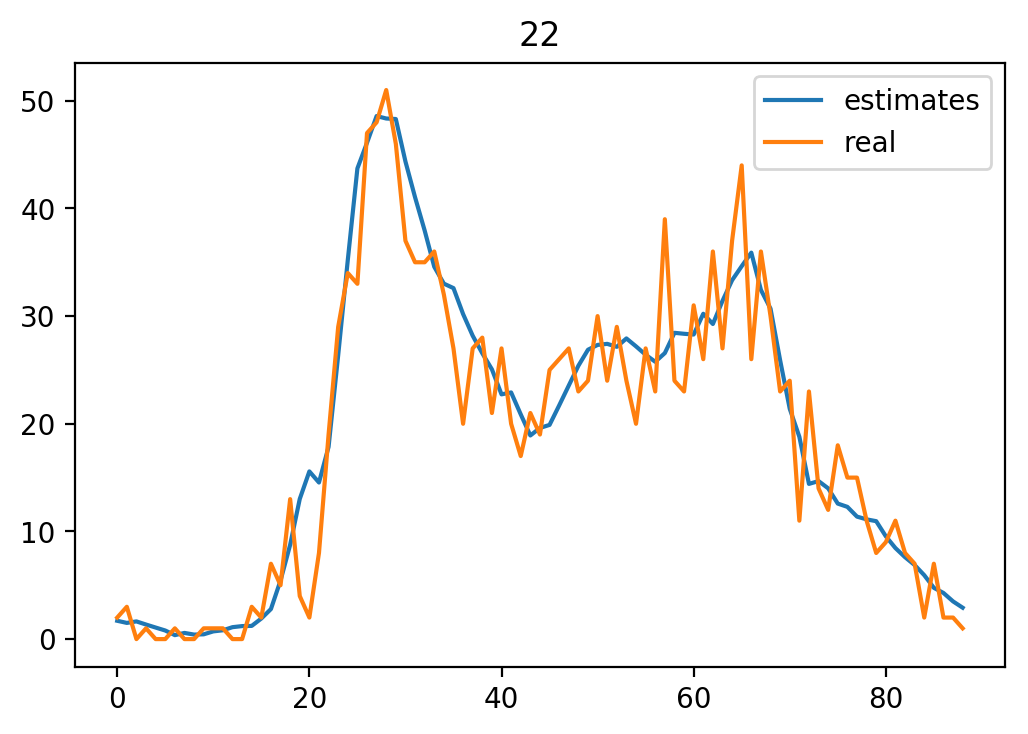

In [11]:
plt.clf()
node = bjh.load_node()
target = np.load(BJ_MODEL_PATH + '_target_0')[:, 0]
output = np.load(BJ_MODEL_PATH + '_output_0')[:, 0]
print(target.shape, output.shape)
for i in range(10):
    plt.figure()
    output_i = output[:, i]
    target_i = target[:, i]
    plt.plot(output_i, label='estimates')
    plt.plot(target_i, label='real')
    plt.legend()
    plt.title(node.id.iloc[i])
    plt.show()
    

## select nodes

In [8]:
flow = bjh.load_ts().mean(0)
selected_nodes = flow.index[flow > sorted(flow.values)[-10]]

In [10]:
print(flow[selected_nodes])

133    66.533250
133    68.608167
68     69.096543
68     71.779589
511    41.689727
511    49.829503
512    31.446898
512    30.313198
133    66.533250
133    68.608167
56     28.752264
56     40.990357
68     69.096543
68     71.779589
511    41.689727
511    49.829503
512    31.446898
512    30.313198
dtype: float64


### Attention Continuity

In [ ]:
reload(graph)
reload(utils)
for attn_str, attn in zip(['input', 'hidden'], [attn_i, attn_h]):
    for time in range(36, 48):
        time_str = utils.minute_str(time * 15 + 60)
        for head in range(4):
            gs = graph.build_od_attention_graphs(attn[time, 1, head], node)
            plt.clf()
            title = time_str + '  ' + attn_str + ' head ' + str(head)
            fig, axes = plt.subplots(2, 2)
            fig.suptitle(title)
            for g, ax in zip(gs, axes.flat):
                graph.draw_network(g, ax=ax)
                ax.set_axis_off()
            plt.show()


In [ ]:
reload(graph)
reload(utils)
for attn_str, attn in zip(['input', 'hidden'], [attn_i, attn_h]):
    for time in range(36, 80, 4):
        time_str = utils.minute_str(time * 15 + 60)
        for head in range(4):
            gs = graph.build_od_attention_graphs(attn[time, 1, head], node)
            plt.clf()
            title = time_str + '  ' + attn_str + ' head ' + str(head)
            fig, axes = plt.subplots(2, 2)
            fig.suptitle(title)
            for g, ax in zip(gs, axes.flat):
                graph.draw_network(g, ax=ax)
                ax.set_axis_off()
            plt.show()


In [13]:
BJ_MODEL_PATH = 'data/models/BJ_highway/GRARNNGRUHead4Hid64Lay2NodeTimeDay15min'
attn_i = np.load(BJ_MODEL_PATH + '_info_01')
attn_h = np.load(BJ_MODEL_PATH + '_info_11')
print(attn_i.shape, attn_h.shape)
times, num_layers, head_count, _, _ = attn_i.shape
node = bjh.load_node().loc[bjh.ids]

(89, 2, 4, 264, 264) (89, 2, 4, 264, 264)


In [ ]:
reload(graph)
for attn_str, attn in zip(['input', 'hidden'], [attn_i, attn_h]):
    for time in range(36, 80, 4):
        time_str = utils.minute_str(time * 15 + 60)
        for head in range(4):
            gs = graph.build_od_attention_graphs(attn[time, 1, head], node)
            plt.clf()
            title = time_str + '  ' + attn_str + ' head ' + str(head)
            fig, axes = plt.subplots(2, 2)
            fig.suptitle(title)
            for g, ax in zip(gs, axes.flat):
                graph.draw_network(g, ax=ax)
                ax.set_axis_off()
            plt.show()
